Requirements:
- Math
- Random
- Pandas (for analysis)
- Matplotlob (for visualization)
- Numpy
- Pygame (for visualization

In [2]:
import math
import random
import pandas as pd
import pygame as pg
import matplotlib.pyplot as plt
import numpy as np
from random import randint, uniform

pygame 2.6.1 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Monte Carlo version for Analysis

- Define the simulation environment

In [5]:
class Simulation:
    """
    Simulator object
    """
    def __init__(self, NUM_BOIDS=300, NUM_OBSTACLES=5, NUM_ITERATIONS=1000):
        """
        Initial the simulation
        """
        self.running = False
        self.clock = pg.time.Clock()
        self.screen = pg.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
        self.screen_rect = self.screen.get_rect()
        self.fps = 30

        # Parameters to control
        self.separation = SEPARATION
        self.alignment = ALIGNMENT
        self.cohesion = COHESION
        self.avoid = AVOID

        # Hyper Parameters (no. of boids and obstacles)
        self.boids = [Boid(self, (randint(0, SCREEN_WIDTH), randint(0, SCREEN_HEIGHT))) for _ in range(NUM_BOIDS)]
        self.obstacles = [Obstacle(self, (randint(100, SCREEN_WIDTH-100), randint(100, SCREEN_HEIGHT-100)), OBSTACLE_RADIUS) for _ in range(NUM_OBSTACLES)]
        
        # Metrics to track
        self.speeds = []
        self.cohesion_values = []
        self.separation_values = []
        self.alignment_values = []
        self.energy_efficiency = []
        self.flocking_radius = []
        self.turn_rate_values = []
        self.dispersion_values = []

        # Number of iterations
        self.iterations = NUM_ITERATIONS

    def draw(self):
        """
        Draw the boids and obstacles
        """
        self.screen.fill(WHITE)
        for boid in self.boids:
            boid.draw(self.screen)
        for obstacle in self.obstacles:
            obstacle.draw(self.screen)
        self.display_parameters()
        pg.display.update()

    def update(self):
        """
        Update the metrics and state of boids
        """
        # Calculate metrics each frame
        self.calculate_metrics()
        # Update the boids
        for boid in self.boids:
            boid.update()

    def calculate_metrics(self):
        """
        Calculate the metrics for analysis
        """
        # Calculate average speed
        avg_speed = sum([boid.vel.length() for boid in self.boids]) / len(self.boids)
        self.speeds.append(avg_speed)

        # Calculate cohesion
        cohesion_value = sum([self.calculate_cohesion(boid) for boid in self.boids]) / len(self.boids)
        self.cohesion_values.append(cohesion_value)

        # Calculate separation
        separation_value = sum([self.calculate_separation(boid) for boid in self.boids]) / len(self.boids)
        self.separation_values.append(separation_value)

        # Calculate alignment
        alignment_value = sum([self.calculate_alignment(boid) for boid in self.boids]) / len(self.boids)
        self.alignment_values.append(alignment_value)

        # Calculate energy efficiency
        energy_efficiency_value = self.calculate_energy_efficiency()
        self.energy_efficiency.append(energy_efficiency_value)

        # Calculate flocking radius
        flock_radius_value = self.calculate_flocking_radius()
        self.flocking_radius.append(flock_radius_value)

        # Calculate turn rate
        turn_rate_value = self.calculate_turn_rate()
        self.turn_rate_values.append(turn_rate_value)

        # Calculate dispersion
        dispersion_value = self.calculate_dispersion()
        self.dispersion_values.append(dispersion_value)

    def calculate_energy_efficiency(self):
        """
        Energy Efficiency
        """
        total_velocity_change = 0
        total_distance = 0
        for boid in self.boids:
            total_velocity_change += boid.vel.length() - boid.prev_vel.length()
            total_distance += boid.vel.length()
        if total_distance == 0:
            return 0
        return total_velocity_change / total_distance if total_distance != 0 else 0

    def calculate_flocking_radius(self):
        """
        Flocking radius
        """
        center_of_mass = self.get_center_of_mass()
        distances = [center_of_mass.distance_to(boid.pos) for boid in self.boids]
        return np.mean(distances)

    def calculate_turn_rate(self):
        """
        Turn rate
        """
        turn_rates = []
        for boid in self.boids:
            # Calculate the angle between the current and previous velocity vectors
            angle_diff = boid.vel.angle_to(boid.prev_vel)
            turn_rates.append(abs(angle_diff))  # Absolute value to prevent negative turn rate
        return np.mean(turn_rates)

    def calculate_dispersion(self):
        """
        Dispersion
        """
        center_of_mass = self.get_center_of_mass()
        distances = [center_of_mass.distance_to(boid.pos) for boid in self.boids]
        return np.std(distances)

    def get_center_of_mass(self):
        """
        Center of mass
        """
        x = sum([boid.pos.x for boid in self.boids]) / len(self.boids)
        y = sum([boid.pos.y for boid in self.boids]) / len(self.boids)
        return pg.math.Vector2(x, y)

    def calculate_cohesion(self, boid):
        """
        Cohesion force (for analysis)
        """
        force = pg.math.Vector2(0, 0)
        boids = boid.boids_in_radius(COHESION_RADIUS)
        for other_boid in boids:
            force += other_boid.pos
        if boids:
            force /= len(boids)
            force -= boid.pos
        return force.length()

    def calculate_separation(self, boid):
        """
        Separation force (for analysis)
        """
        force = pg.math.Vector2(0, 0)
        for other_boid in boid.boids_in_radius(SEPARATION_RADIUS):
            diff = boid.pos - other_boid.pos
            distance = max(diff.length(), 1)
            force += diff / distance
        return force.length()

    def calculate_alignment(self, boid):
        """
        Alignment force (for analysis)
        """
        force = pg.math.Vector2(0, 0)
        boids = boid.boids_in_radius(ALIGNMENT_RADIUS)
        for other_boid in boids:
            force += other_boid.vel
        if boids:
            force /= len(boids)
            force -= boid.vel
        return force.length()

    def display_parameters(self):
        """
        Display parameters on the screen
        """
        font = pg.font.Font(None, 36)
        text = font.render(f"Separation: {self.separation:.2f}  Alignment: {self.alignment:.2f}  Cohesion: {self.cohesion:.2f}",
                           True, (0, 0, 255))
        self.screen.blit(text, (10, 10))

    def add_obstacle(self):
        """
        Add a new obstacle at a random position
        """
        position = (randint(100, SCREEN_WIDTH-100), randint(100, SCREEN_HEIGHT-100))
        self.obstacles.append(Obstacle(self, position, OBSTACLE_RADIUS))

    def remove_obstacle(self):
        """
        Remove a random obstacle
        """
        if self.obstacles:
            self.obstacles.pop(randint(0, len(self.obstacles) - 1))

    def run(self):
        """
        Run the simulation
        """
        global SEPARATION, ALIGNMENT, COHESION
        pg.init() # SStart the simulation
        pg.display.set_caption("Boids with Obstacles") # Display the caption
        self.running = True
        paused = False
        # for step in range(self.iterations):
        while self.running:
            for event in pg.event.get():
                if event.type == pg.QUIT:
                    self.running = False
                if event.type == pg.KEYDOWN:
                    if event.key == pg.K_p:  # Toggle pause (Press P)
                        paused = not paused
                    if event.key == pg.K_r: # Restart (Press R)
                        self.boids = [Boid(self, (randint(0, SCREEN_WIDTH), randint(0, SCREEN_HEIGHT))) for _ in range(NUM_BOIDS)]
                    if event.key == pg.K_q:  # Increase separation (Press Q)
                        self.separation = min(self.separation + 0.1, 5)
                    elif event.key == pg.K_a:  # Decrease separation (Press A)
                        self.separation = max(self.separation - 0.1, 0)
                    elif event.key == pg.K_w:  # Increase alignment (Press W)
                        self.alignment = min(self.alignment + 0.1, 5)
                    elif event.key == pg.K_s:  # Decrease alignment (Press S)
                        self.alignment = max(self.alignment - 0.1, 0)
                    elif event.key == pg.K_e:  # Increase cohesion (Press E)
                        self.cohesion = min(self.cohesion + 0.1, 5)
                    elif event.key == pg.K_d:  # Decrease cohesion (Press D)
                        self.cohesion = max(self.cohesion - 0.1, 0)
                    elif event.key == pg.K_UP:  # Add obstacle (Press the UP Arrow)
                        self.add_obstacle()  # Add a new obstacle
                    elif event.key == pg.K_DOWN:  # Remove obstacle (Press the DOWN Arrow)
                        self.remove_obstacle()  # Remove a random obstacle

            if not paused:
                self.clock.tick(self.fps)
                self.update() # Update the boids
                self.draw() # Draw the boids and obstacles

        pg.quit() # End the simulation
        self.plot_metrics() # Plot the metrics after the simulation

    def run_monte_carlo(self, num_trials=100):
        """
        Monte Carlo simulation to test various parameter combinations and their effects.
        """
        results = []  # List to store results for each trial
        pg.init() # Start the simulation
        for trial in range(num_trials):
            pg.display.set_caption("Boids Flocking Simulation - " + str(trial+1))
            # Randomly vary parameters for each trial
            self.separation = random.uniform(0.5, 5)
            self.alignment = random.uniform(0.5, 5)
            self.cohesion = random.uniform(0.5, 5)

            # Run a short simulation for the current parameter set
            self.reset_simulation()
            for _ in range(self.iterations):  # Run for a limited number of steps
                self.running = True
                paused = False
                for event in pg.event.get():
                    if event.type == pg.QUIT:
                        self.running = False
                    if event.type == pg.KEYDOWN:
                        if event.key == pg.K_p:  # Toggle pause (Press P)
                            paused = not paused
                        if event.key == pg.K_r: # Restart (Press R)
                            self.boids = [Boid(self, (randint(0, SCREEN_WIDTH), randint(0, SCREEN_HEIGHT))) for _ in range(NUM_BOIDS)]
                        if event.key == pg.K_q:  # Increase separation (Press Q)
                            self.separation = min(self.separation + 0.1, 5)
                        elif event.key == pg.K_a:  # Decrease separation (Press A)
                            self.separation = max(self.separation - 0.1, 0)
                        elif event.key == pg.K_w:  # Increase alignment (Press W)
                            self.alignment = min(self.alignment + 0.1, 5)
                        elif event.key == pg.K_s:  # Decrease alignment (Press S)
                            self.alignment = max(self.alignment - 0.1, 0)
                        elif event.key == pg.K_e:  # Increase cohesion (Press E)
                            self.cohesion = min(self.cohesion + 0.1, 5)
                        elif event.key == pg.K_d:  # Decrease cohesion (Press D)
                            self.cohesion = max(self.cohesion - 0.1, 0)
                        elif event.key == pg.K_UP:  # Add obstacle (Press the UP Arrow)
                            self.add_obstacle()  # Add a new obstacle
                        elif event.key == pg.K_DOWN:  # Remove obstacle (Press the DOWN Arrow)
                            self.remove_obstacle()  # Remove a random obstacle
    
                if not paused:
                    self.clock.tick(self.fps)
                    self.update() # Update the boids
                    self.draw() # Draw the boids and obstacles

            # Collect metrics
            avg_speed = sum(self.speeds) / len(self.speeds)
            avg_cohesion = sum(self.cohesion_values) / len(self.cohesion_values)
            avg_separation = sum(self.separation_values) / len(self.separation_values)
            avg_alignment = sum(self.alignment_values) / len(self.alignment_values)
            avg_dispersion = sum(self.dispersion_values) / len(self.dispersion_values)
            avg_energy_efficiency = sum(self.energy_efficiency) / len(self.energy_efficiency)
            avg_flocking_radius = sum(self.flocking_radius) / len(self.flocking_radius)
            turn_rate_values = sum(self.turn_rate_values) / len(self.turn_rate_values)

            # Save results
            results.append({
                "separation": self.separation,
                "alignment": self.alignment,
                "cohesion": self.cohesion,
                "avg_speed": avg_speed,
                "avg_cohesion": avg_cohesion,
                "avg_separation": avg_separation,
                "avg_alignment": avg_alignment,
                "avg_dispersion": avg_dispersion,
                "avg_energy_efficiency": avg_energy_efficiency,
                "avg_flocking_radius": avg_flocking_radius,
                "avg_turn_rate_values": turn_rate_values,
            })
            print(f"Trial {trial + 1}/{num_trials} completed.")
        pg.quit() # End the simulation

        # Analyze the results
        return self.analyze_monte_carlo_results(results)

    def run_monte_carlo_series(self, num_trials=100):
        """
        Run different simulations to analyze the average metrics vs time
        """
        results = []  # List to store results for each trial
        avg_speed = []
        avg_cohesion = []
        avg_separation = []
        avg_alignment = []
        avg_dispersion = []
        avg_energy_efficiency = []
        avg_flocking_radius = []
        turn_rate_values = []
        
        pg.init() # Start the simulation
        for trial in range(num_trials):
            pg.display.set_caption("Boids Flocking Simulation - " + str(trial+1))
            # Run a short simulation for the current parameter set
            self.reset_simulation()
            for _ in range(self.iterations):  # Run for a limited number of steps
                self.running = True
                paused = False
                for event in pg.event.get():
                    if event.type == pg.QUIT:
                        self.running = False
                    if event.type == pg.KEYDOWN:
                        if event.key == pg.K_p:  # Toggle pause (Press P)
                            paused = not paused
                        if event.key == pg.K_r: # Restart (Press R)
                            self.boids = [Boid(self, (randint(0, SCREEN_WIDTH), randint(0, SCREEN_HEIGHT))) for _ in range(NUM_BOIDS)]
                        if event.key == pg.K_q:  # Increase separation (Press Q)
                            self.separation = min(self.separation + 0.1, 5)
                        elif event.key == pg.K_a:  # Decrease separation (Press A)
                            self.separation = max(self.separation - 0.1, 0)
                        elif event.key == pg.K_w:  # Increase alignment (Press W)
                            self.alignment = min(self.alignment + 0.1, 5)
                        elif event.key == pg.K_s:  # Decrease alignment (Press S)
                            self.alignment = max(self.alignment - 0.1, 0)
                        elif event.key == pg.K_e:  # Increase cohesion (Press E)
                            self.cohesion = min(self.cohesion + 0.1, 5)
                        elif event.key == pg.K_d:  # Decrease cohesion (Press D)
                            self.cohesion = max(self.cohesion - 0.1, 0)
                        elif event.key == pg.K_UP:  # Add obstacle (Press the UP Arrow)
                            self.add_obstacle()  # Add a new obstacle
                        elif event.key == pg.K_DOWN:  # Remove obstacle (Press the DOWN Arrow)
                            self.remove_obstacle()  # Remove a random obstacle
    
                if not paused:
                    self.clock.tick(self.fps)
                    self.update() # Update the boids
                    self.draw() # Draw the boids and obstacles

            # Collect metrics
            avg_speed.append(self.speeds)
            avg_cohesion.append(self.cohesion_values)
            avg_separation.append(self.separation_values)
            avg_alignment.append(self.alignment_values)
            avg_dispersion.append(self.dispersion_values)
            avg_energy_efficiency.append(self.energy_efficiency)
            avg_flocking_radius.append(self.flocking_radius)
            turn_rate_values.append(self.turn_rate_values)
            print(f"Trial {trial + 1}/{num_trials} completed.")

        # Save results
        results={
            "avg_speed": avg_speed,
            "avg_cohesion": avg_cohesion,
            "avg_separation": avg_separation,
            "avg_alignment": avg_alignment,
            "avg_dispersion": avg_dispersion,
            "avg_energy_efficiency": avg_energy_efficiency,
            "avg_flocking_radius": avg_flocking_radius,
            "avg_turn_rate_values": turn_rate_values,
        }
        pg.quit() # End the simulation

        # Analyze the results
        average = {}
        for i, metric in enumerate(["avg_speed", "avg_cohesion", "avg_separation", "avg_alignment", 
                                    "avg_dispersion", "avg_energy_efficiency", "avg_flocking_radius", "avg_turn_rate_values"]):
            average["mean_"+metric] = np.mean(results[metric], axis=0)
            average["std_"+metric] = np.std(results[metric], axis=0)
        return self.analyze_monte_carlo_results(average)

    def reset_simulation(self):
        """
        Resets the simulation to its initial state with the current parameters
        """
        self.boids = [Boid(self, (randint(0, SCREEN_WIDTH), randint(0, SCREEN_HEIGHT))) for _ in range(NUM_BOIDS)]
        self.obstacles = [Obstacle(self, (randint(100, SCREEN_WIDTH-100), randint(100, SCREEN_HEIGHT-100)), OBSTACLE_RADIUS) for _ in range(NUM_OBSTACLES)]
        self.speeds = []
        self.cohesion_values = []
        self.separation_values = []
        self.alignment_values = []
        self.energy_efficiency = []
        self.flocking_radius = []
        self.turn_rate_values = []
        self.dispersion_values = []

    def analyze_monte_carlo_results(self, results):
        """
        Analyze the results from the Monte Carlo simulation
        """
        # Convert results to a DataFrame for easier analysis
        df = pd.DataFrame(results)
        return df

    def plot_monte_carlo_metrics(self, df, figsize=(10, 10)):
        """
        Plot the Monte Carlo results for function 'run_monte_carlo'
        """
        # Plot parameter influence on metrics
        plt.figure(figsize=figsize)

        for i, metric in enumerate(["avg_speed", "avg_cohesion", "avg_separation", "avg_alignment", 
                                    "avg_dispersion", "avg_energy_efficiency", "avg_flocking_radius", "avg_turn_rate_values"]):
            plt.subplot(2, 4, i + 1)
            for param in ["separation", "alignment", "cohesion"]:
                plt.scatter(df[param], df[metric], label=f"{param.capitalize()} vs {metric}")
            plt.title(f"{metric.capitalize()} vs Parameters")
            plt.xlabel("Parameter Value")
            plt.ylabel(metric.capitalize())
            plt.legend()

        plt.tight_layout()
        plt.savefig("Obstacles_"+str(len(self.obstacles))+"_Boids_"+str(len(self.boids))+".png")
        plt.show()

    def plot_monte_carlo_series_metrics(self, df, figsize=(10, 10)):
        """
        Plot the Monte Carlo results for function 'run_monte_carlo_series'
        """
        # Plot parameter influence on metrics
        plt.figure(figsize=figsize)

        for i, metric in enumerate(["avg_speed", "avg_cohesion", "avg_separation", "avg_alignment", 
                                    "avg_dispersion", "avg_energy_efficiency", "avg_flocking_radius", "avg_turn_rate_values"]):
            plt.subplot(2, 4, i + 1)
            plt.plot(df["mean_"+metric], label=metric.capitalize())
            plt.fill_between(range(len(df["mean_"+metric])), 
                             df["mean_"+metric] - df["std_"+metric], 
                             df["mean_"+metric] + df["std_"+metric], alpha=0.3)
            plt.xlabel("Time (frames)")
            plt.ylabel(metric.capitalize())
            plt.title(f"{metric.capitalize()} vs Time")
            plt.legend()

        plt.tight_layout()
        plt.savefig("Obstacles_"+str(len(self.obstacles))+"_Boids_"+str(len(self.boids))+"_time_series.png")
        plt.show()
        
    def plot_metrics(self):
        """
        Plot all the metrics after the simulation ends
        """
        plt.figure(figsize=(16, 10))

        # Speed Plot
        plt.subplot(2, 4, 1)
        plt.plot(self.speeds)
        plt.title("Average Speed Over Time")
        plt.xlabel("Time (frames)")
        plt.ylabel("Speed")

        # Cohesion Plot
        plt.subplot(2, 4, 2)
        plt.plot(self.cohesion_values)
        plt.title("Average Cohesion Over Time")
        plt.xlabel("Time (frames)")
        plt.ylabel("Cohesion")

        # Separation Plot
        plt.subplot(2, 4, 3)
        plt.plot(self.separation_values)
        plt.title("Average Separation Over Time")
        plt.xlabel("Time (frames)")
        plt.ylabel("Separation")

        # Alignment Plot
        plt.subplot(2, 4, 4)
        plt.plot(self.alignment_values)
        plt.title("Average Alignment Over Time")
        plt.xlabel("Time (frames)")
        plt.ylabel("Alignment")

        # Turn Rate Plot
        plt.subplot(2, 4, 5)
        plt.plot(self.turn_rate_values)
        plt.title("Turn Rate Over Time")
        plt.xlabel("Time (frames)")
        plt.ylabel("Turn Rate")

        # Flocking Radius Plot
        plt.subplot(2, 4, 6)
        plt.plot(self.flocking_radius)
        plt.title("Flocking Radius Over Time")
        plt.xlabel("Time (frames)")
        plt.ylabel("Flocking Radius")

        # Energy Efficiency Plot
        plt.subplot(2, 4, 7)
        plt.plot(self.energy_efficiency)
        plt.title("Energy Efficiency Over Time")
        plt.xlabel("Time (frames)")
        plt.ylabel("Energy Efficiency")

        # Dispersion Plot
        plt.subplot(2, 4, 8)
        plt.plot(self.dispersion_values)
        plt.title("Dispersion Over Time")
        plt.xlabel("Time (frames)")
        plt.ylabel("Dispersion")

        plt.tight_layout()
        plt.savefig("Demo.png")
        plt.show()

- Define the obstacle object

In [7]:
class Obstacle:
    """
    Obstacle object
    """
    def __init__(self, simulation, position, radius):
        """
        Initial the obstacles
        """
        self.simulation = simulation
        self.pos = pg.math.Vector2(position)
        self.radius = radius

    def draw(self, screen):
        """
        Draw the obstacles on the screen
        """
        pg.draw.circle(screen, (255, 0, 0), (int(self.pos.x), int(self.pos.y)), self.radius)

- Define the physical object class for visualization

In [9]:
class PhysicsObject:
    """
    An abstract class representing an object following simple physics laws
    """
    def __init__(self, simulation, position):
        self.simulation = simulation
        self.acc = pg.math.Vector2(0, 0)
        self.vel = pg.math.Vector2(uniform(-1, 1), uniform(-1, 1))
        self.pos = pg.math.Vector2(position)
        self.speed = SPEED
        self.friction = 0.9

    def update(self):
        """
        Update the position and velocity of an object
        """
        self.vel += self.acc
        self.pos += self.vel * self.speed
        self.acc *= 0
        self.vel *= self.friction
        self.wrap_around()

    def wrap_around(self):
        """
        If the object crosses the screen's border, it will move back
        """
        if self.pos.x > self.simulation.screen_rect.w:
            self.pos.x -= self.simulation.screen_rect.w
        elif self.pos.x < 0:
            self.pos.x += self.simulation.screen_rect.w
        if self.pos.y > self.simulation.screen_rect.h:
            self.pos.y -= self.simulation.screen_rect.h
        elif self.pos.y < 0:
            self.pos.y += self.simulation.screen_rect.h

## Define the boid class with its moving rules

Pseudocode: https://vergenet.net/~conrad/boids/pseudocode.html (with some adjustments)

Source of all images: https://cs.stanford.edu/people/eroberts/courses/soco/projects/2008-09/modeling-natural-systems/boids.html

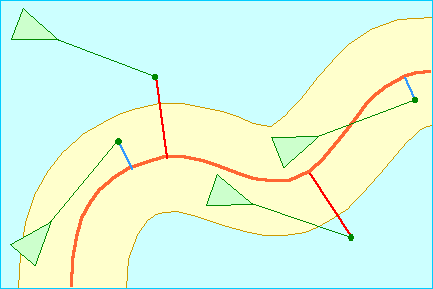

- **Boid Behavior and Interaction**: Each Boid follows a set of behavioral rules to interact with others and its environment:
    - **Wander**: Boids  have a slight randomness to movements, making them appear more natural and less predictable
    - **Separation**: Boids maintain personal space by avoiding crowding their neighbors.
    - **Alignment**: Boids align their movement direction with the average heading of nearby Boids.
    - **Cohesion**: Boids gravitate toward the average position of their neighbors to stay together.
    - **Obstacle Avoidance**: Boids actively steer away from obstacles to prevent collisions.
- **Force Calculation and Movement**: The forces for each Boid from the behaviors are calculated and combined to produce a resultant force, which adjusts the Boid's direction and speed.
- **Visual Representation**: On the screen, Boids are depicted as simple triangles whose orientation aligns with their current velocity vector.

### 1. Velocity Update Rule
The velocity $ \mathbf{v}_{\text{new}} $ for a boid is updated as:
$$
\mathbf{v}_{\text{new}} = \mathbf{v}_{\text{old}} + \Delta t \cdot \mathbf{a},
$$
where:
$$
\mathbf{a} = w_w \cdot \mathbf{a}_{\text{wan}} + w_s \cdot \mathbf{a}_{\text{sep}} + w_a \cdot \mathbf{a}_{\text{align}} + w_c \cdot \mathbf{a}_{\text{coh}} + w_o \cdot \mathbf{a}_{\text{obs}}.
$$

- For simplicity, we set $ w_w = w_s = w_a = w_c = w_o = \Delta t = 1 $

---

### 2. Position Update
Finally, the position $ \mathbf{p}_{\text{new}} $ is updated as:
$$
\mathbf{p}_{\text{new}} = \mathbf{p}_{\text{old}} + \Delta t \cdot \mathbf{v}_{\text{new}}.
$$

---

### 3. Separation Rule

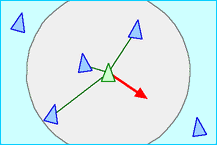

The separation acceleration $ \mathbf{a}_{\text{sep}} $ ensures boids avoid getting too close:
$$
\mathbf{a}_{\text{sep}} = \text{limit}\left(\sum_{j \in \text{neighbors}} \frac{\mathbf{p}_i - \mathbf{p}_j}{ \max ( \|\mathbf{p}_i - \mathbf{p}_j\|, 1 )}, \, F_{\text{max}}\right),
$$
where:
- $ \mathbf{p}_i $: Position of the current Boid
- $ \mathbf{p}_j $: Position of a neighboring Boid
- $ F_{\text{max}} $: Maximum allowable force
- The sum is over all neighbors within the **separation radius**

---

### 4. Alignment Rule

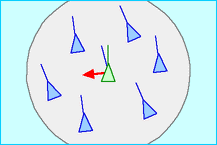

The alignment acceleration $ \mathbf{a}_{\text{align}} $ aligns the velocity (alignment) of the boid with the average velocity of nearby boids:
$$
\mathbf{a}_{\text{align}} = \text{limit}\left[ \frac{1}{N} \left( \sum_{j \in \text{neighbors}} \mathbf{v}_j \right) - \mathbf{v}_i , \, F_{\text{max}} \right],
$$
where:
- $ \mathbf{v}_j $: Velocity of a neighboring Boid
- $ \mathbf{v}_i $: Velocity of a current Boid
- $ N $: Number of neighbors within the **alignment radius**

---

### 5. Cohesion Rule

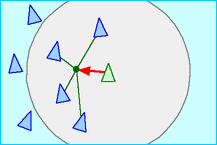

The cohesion acceleration $ \mathbf{a}_{\text{coh}} $ pulls the boid towards the center of mass (average position) of its neighbors:
$$
\mathbf{a}_{\text{coh}} = \text{limit}\left[ \frac{1}{N} \left( \sum_{j \in \text{neighbors}} \mathbf{p}_j \right) - \mathbf{p}_i , \, F_{\text{max}} \right],
$$
where:
- $ \mathbf{p}_j $: Position of a neighboring Boid
- $ \mathbf{p}_i $: Position of a current Boid
- $ N $: Number of neighbors within the **cohesion radius**

---

### 6. Obstacle Avoidance Rule
The obstacle avoidance acceleration $ \mathbf{a}_{\text{obs}} $ prevents collisions with obstacles:
$$
\mathbf{a}_{\text{obs}} = \text{limit}\left(\sum_{k \in \text{obstacles}} \frac{\mathbf{p}_i - \mathbf{p}_k}{\|\mathbf{p}_i - \mathbf{p}_k\|}, \, F_{\text{max}}\right),
$$
where:
- $ \mathbf{p}_k $: Position of an obstacle
- The force magnitude increases as the boid gets closer to the obstacle

---

### 7. Limit Forces
All forces are capped to a maximum magnitude $ F_{\text{max}} $:
$$
\text{limit}(\mathbf{f}, F_{\text{max}}) =
\begin{cases}
\mathbf{f} & \|\mathbf{f}\| \leq F_{\text{max}}, \\
F_{\text{max}} \cdot \frac{\mathbf{f}}{\|\mathbf{f}\|} & \|\mathbf{f}\| > F_{\text{max}}.
\end{cases}
$$


In [16]:
class Boid(PhysicsObject):
    """
    Represents a Boid, inheriting from PhysicsObject, and containing methods for each behavioral rule 
    (obstacles avoidance, separation, alignment, cohesion, and wandering)
    """
    def __init__(self, simulation, position):
        super().__init__(simulation, position)
        self.prev_vel = pg.math.Vector2(self.vel)  # Initialize prev_vel

    def update(self):
        """
        Update the boids' moving
        """
        # Store the current velocity before updating
        self.prev_vel = pg.math.Vector2(self.vel)

        # Apply the behaviors
        self.acc += self.wander() # Add the random movement behavior
        self.acc += self.separation() * self.simulation.separation # Add the separation behavior
        self.acc += self.alignment() * self.simulation.alignment # Add the alignment behavior
        self.acc += self.cohesion() * self.simulation.cohesion # Add the cohesion behavior
        self.acc += self.dodge_obstacles() * self.simulation.avoid  # Add the obstacle avoidance behavior
        super().update()

    def wander(self):
        """
        Random movement
        """
        force = pg.math.Vector2(random.uniform(-WANDER_RADIUS, WANDER_RADIUS), random.uniform(-WANDER_RADIUS, WANDER_RADIUS))
        return force

    def dodge_obstacles(self):
        """
        Avoid the obstacles
        """
        force = pg.math.Vector2(0, 0)
        for obstacle in self.simulation.obstacles:
            diff = self.pos - obstacle.pos
            distance = diff.length()
            if distance < obstacle.radius + BOID_SIZE * 2:
                force += diff / distance  # Steering away from the obstacle
        return self.limit_force(force)

    def separation(self):
        """
        Separation rule (for updating the boids' position)
        """
        force = pg.math.Vector2(0, 0)
        for boid in self.boids_in_radius(SEPARATION_RADIUS):
            diff = self.pos - boid.pos
            distance = max(diff.length(), 1)
            force += diff / distance
        return self.limit_force(force)

    def alignment(self):
        """
        Alignment rule (for updating the boids' position)
        """
        force = pg.math.Vector2(0, 0)
        boids = self.boids_in_radius(ALIGNMENT_RADIUS)
        for boid in boids:
            force += boid.vel
        if boids:
            force /= len(boids)
            force -= self.vel
        return self.limit_force(force)

    def cohesion(self):
        """
        Cohesion rule (for updating the boids' position)
        """
        force = pg.math.Vector2(0, 0)
        boids = self.boids_in_radius(COHESION_RADIUS)
        for boid in boids:
            force += boid.pos
        if boids:
            force /= len(boids)
            force -= self.pos
        return self.limit_force(force)

    def boids_in_radius(self, radius):
        """
        Return the boids in the radius
        """
        return [boid for boid in self.simulation.boids if boid != self and self.pos.distance_to(boid.pos) < radius]

    def limit_force(self, force):
        """
        The force for moving
        """
        if force.length() > MAX_FORCE:
            force.scale_to_length(MAX_FORCE)
        return force

    def draw(self, screen):
        """
        Draw the boids
        """
        angle = math.atan2(self.vel.y, self.vel.x)
        points = [
            (self.pos.x + BOID_SIZE * math.cos(angle), self.pos.y + BOID_SIZE * math.sin(angle)),
            (self.pos.x + BOID_SIZE * math.cos(angle + 2.5), self.pos.y + BOID_SIZE * math.sin(angle + 2.5)),
            (self.pos.x + BOID_SIZE * math.cos(angle - 2.5), self.pos.y + BOID_SIZE * math.sin(angle - 2.5)),
        ]
        pg.draw.polygon(screen, BLACK, points)

## Explain the Metrics

### 1. Energy Efficiency
The **energy efficiency** is calculated as:
$$
\text{Energy Efficiency} = \frac{\sum_{i=1}^N (\|\mathbf{v}_i\| - \|\mathbf{v}_i^{\text{prev}}\|)}{\sum_{i=1}^N \|\mathbf{v}_i\|},
$$
where:
- $ \|\mathbf{v}_i\| $: Current velocity magnitude of boid $ i $
- $ \|\mathbf{v}_i^{\text{prev}}\| $: Previous velocity magnitude of boid $ i $
- $ N $: Total number of boids

If $ \sum_{i=1}^N \|\mathbf{v}_i\| = 0 $, the energy efficiency is set to $ 0 $.

---

### 2. Flocking Radius
The **flocking radius** is the mean distance of boids from the center of mass:
$$
\text{Flocking Radius} = \frac{1}{N} \sum_{i=1}^N \|\mathbf{p}_i - \mathbf{p}_{\text{cm}}\|,
$$
where:
- $ \mathbf{p}_i $: Position of boid $ i $
- $ \mathbf{p}_{\text{cm}} $: Center of mass of the flock, calculated as:
$$
\mathbf{p}_{\text{cm}} = \frac{1}{N} \sum_{i=1}^N \mathbf{p}_i
$$

---

### 3. Turn Rate
The **turn rate** measures the average angular change in velocity direction:
$$
\text{Turn Rate} = \frac{1}{N} \sum_{i=1}^N |\theta_i|,
$$
where:
- $ \theta_i $: Angle between the current velocity $ \mathbf{v}_i $ and the previous velocity $ \mathbf{v}_i^{\text{prev}} $ for boid $ i $

---

### 4. Dispersion
The **dispersion** is the standard deviation of distances of boids from the center of mass:
$$
\text{Dispersion} = \sqrt{\frac{1}{N} \sum_{i=1}^N \left(\|\mathbf{p}_i - \mathbf{p}_{\text{cm}}\| - \text{mean distance}\right)^2},
$$
where $ \mathbf{p}_{\text{cm}} $ is the center of mass.

---

In [20]:
# Color constants
BLACK = (0, 0, 0) # Color of the background
WHITE = (255, 255, 255) # Color of the Boids

# Window Parameters
SCREEN_WIDTH = 1300 # The width of the screen
SCREEN_HEIGHT = 750 # The height of the screen

# Parameters
SPEED = 3 # The speed at which Boids move
MAX_FORCE = 0.5 # The maximum force that can be applied to a Boid for it to change direction

WANDER_RADIUS = 0.2 # The radius within which a Boid will wander randomly

AVOID = 10 # The The degree to which Boids try to avoid the obstacles

SEPARATION = 2 # The degree to which Boids try to maintain distance from one another
SEPARATION_RADIUS = 50 # The radius within which Boids will begin to experience separation force

ALIGNMENT = 1 # The degree to which Boids try to align themselves with the average direction of nearby Boids
ALIGNMENT_RADIUS = 50 # The radius within which Boids will begin to experience alignment force

COHESION = 1 # The degree to which Boids try to move towards the average position of nearby Boids
COHESION_RADIUS = 200 # The radius within which Boids will begin to experience cohesion force

## Visualization 

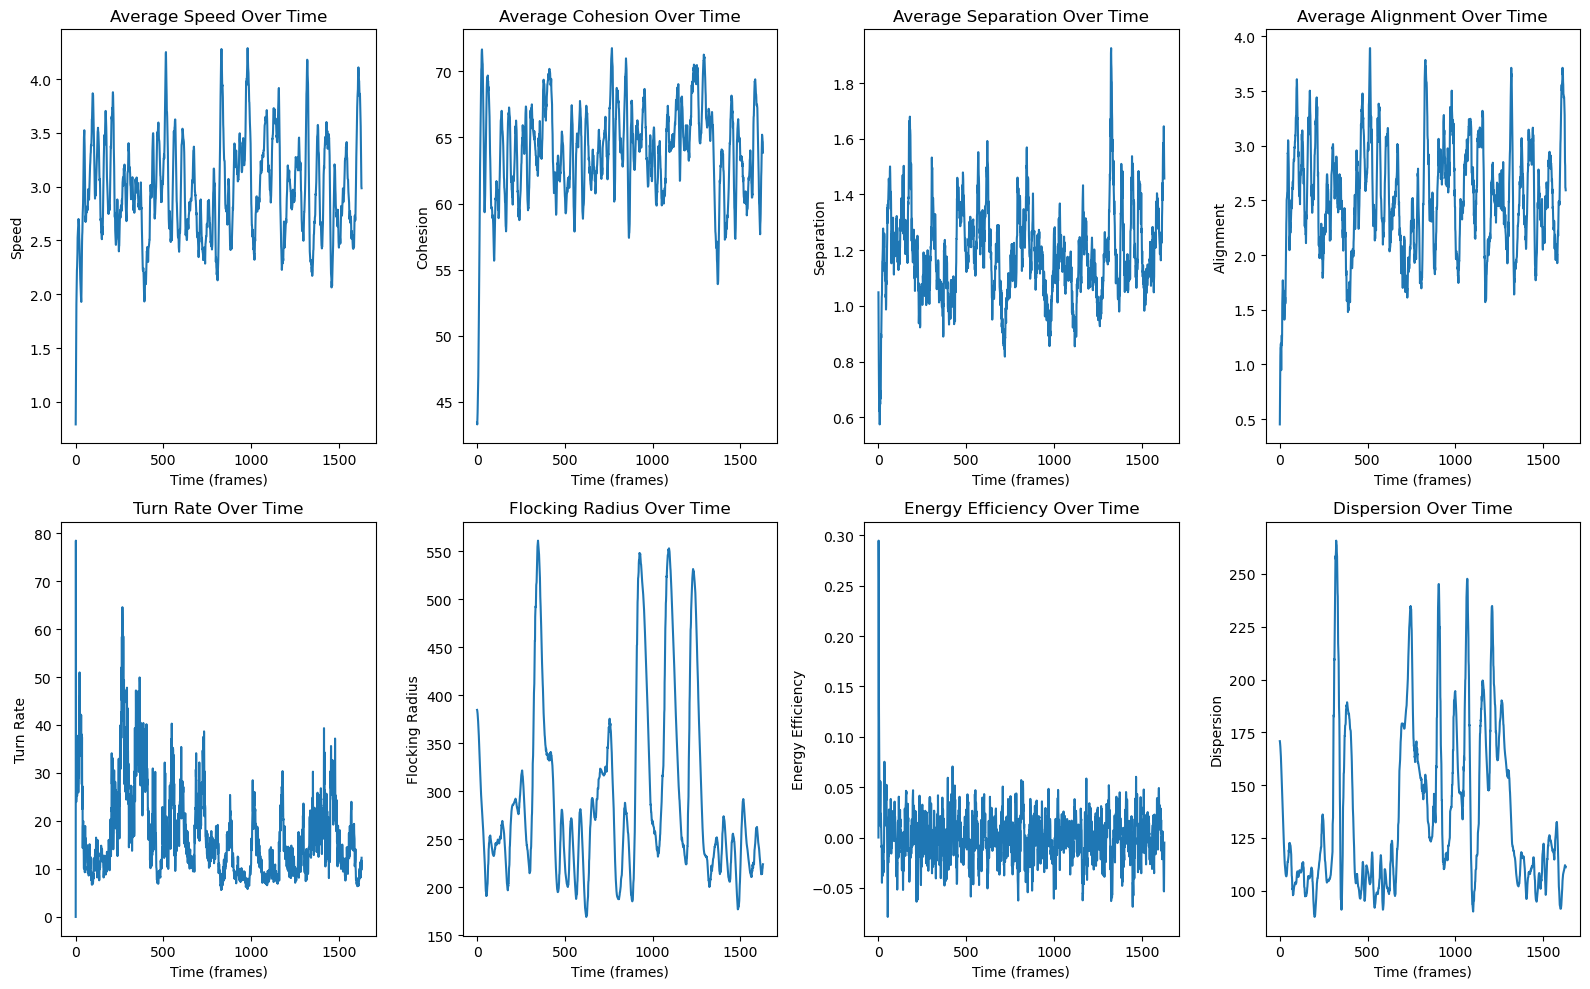

In [23]:
NUM_BOIDS = 200 # Number of Boids
BOID_SIZE = 5 # Size of Boids on the screen

NUM_OBSTACLES = 6 # Number of obstacles
OBSTACLE_RADIUS = 25 # Size of obstacles on the screen

if __name__ == "__main__":
    sim = Simulation(NUM_BOIDS, NUM_OBSTACLES)
    sim.run()

## 6 Obstacles - 200 Boids - Same separations, alignments, and collions

In [26]:
NUM_BOIDS = 200 # Number of Boids
BOID_SIZE = 5 # Size of Boids on the screen

NUM_OBSTACLES = 6 # Number of obstacles
OBSTACLE_RADIUS = 25 # Size of obstacles on the screen

# Running the Monte Carlo simulation
if __name__ == "__main__":
    sim = Simulation(NUM_BOIDS, NUM_OBSTACLES, NUM_ITERATIONS=1000)
    df = sim.run_monte_carlo_series(num_trials=200)  # Adjust the number of trials as needed

Trial 1/200 completed.
Trial 2/200 completed.
Trial 3/200 completed.
Trial 4/200 completed.
Trial 5/200 completed.
Trial 6/200 completed.
Trial 7/200 completed.
Trial 8/200 completed.
Trial 9/200 completed.
Trial 10/200 completed.
Trial 11/200 completed.
Trial 12/200 completed.
Trial 13/200 completed.
Trial 14/200 completed.
Trial 15/200 completed.
Trial 16/200 completed.
Trial 17/200 completed.
Trial 18/200 completed.
Trial 19/200 completed.
Trial 20/200 completed.
Trial 21/200 completed.
Trial 22/200 completed.
Trial 23/200 completed.
Trial 24/200 completed.
Trial 25/200 completed.
Trial 26/200 completed.
Trial 27/200 completed.
Trial 28/200 completed.
Trial 29/200 completed.
Trial 30/200 completed.
Trial 31/200 completed.
Trial 32/200 completed.
Trial 33/200 completed.
Trial 34/200 completed.
Trial 35/200 completed.
Trial 36/200 completed.
Trial 37/200 completed.
Trial 38/200 completed.
Trial 39/200 completed.
Trial 40/200 completed.
Trial 41/200 completed.
Trial 42/200 completed.
T

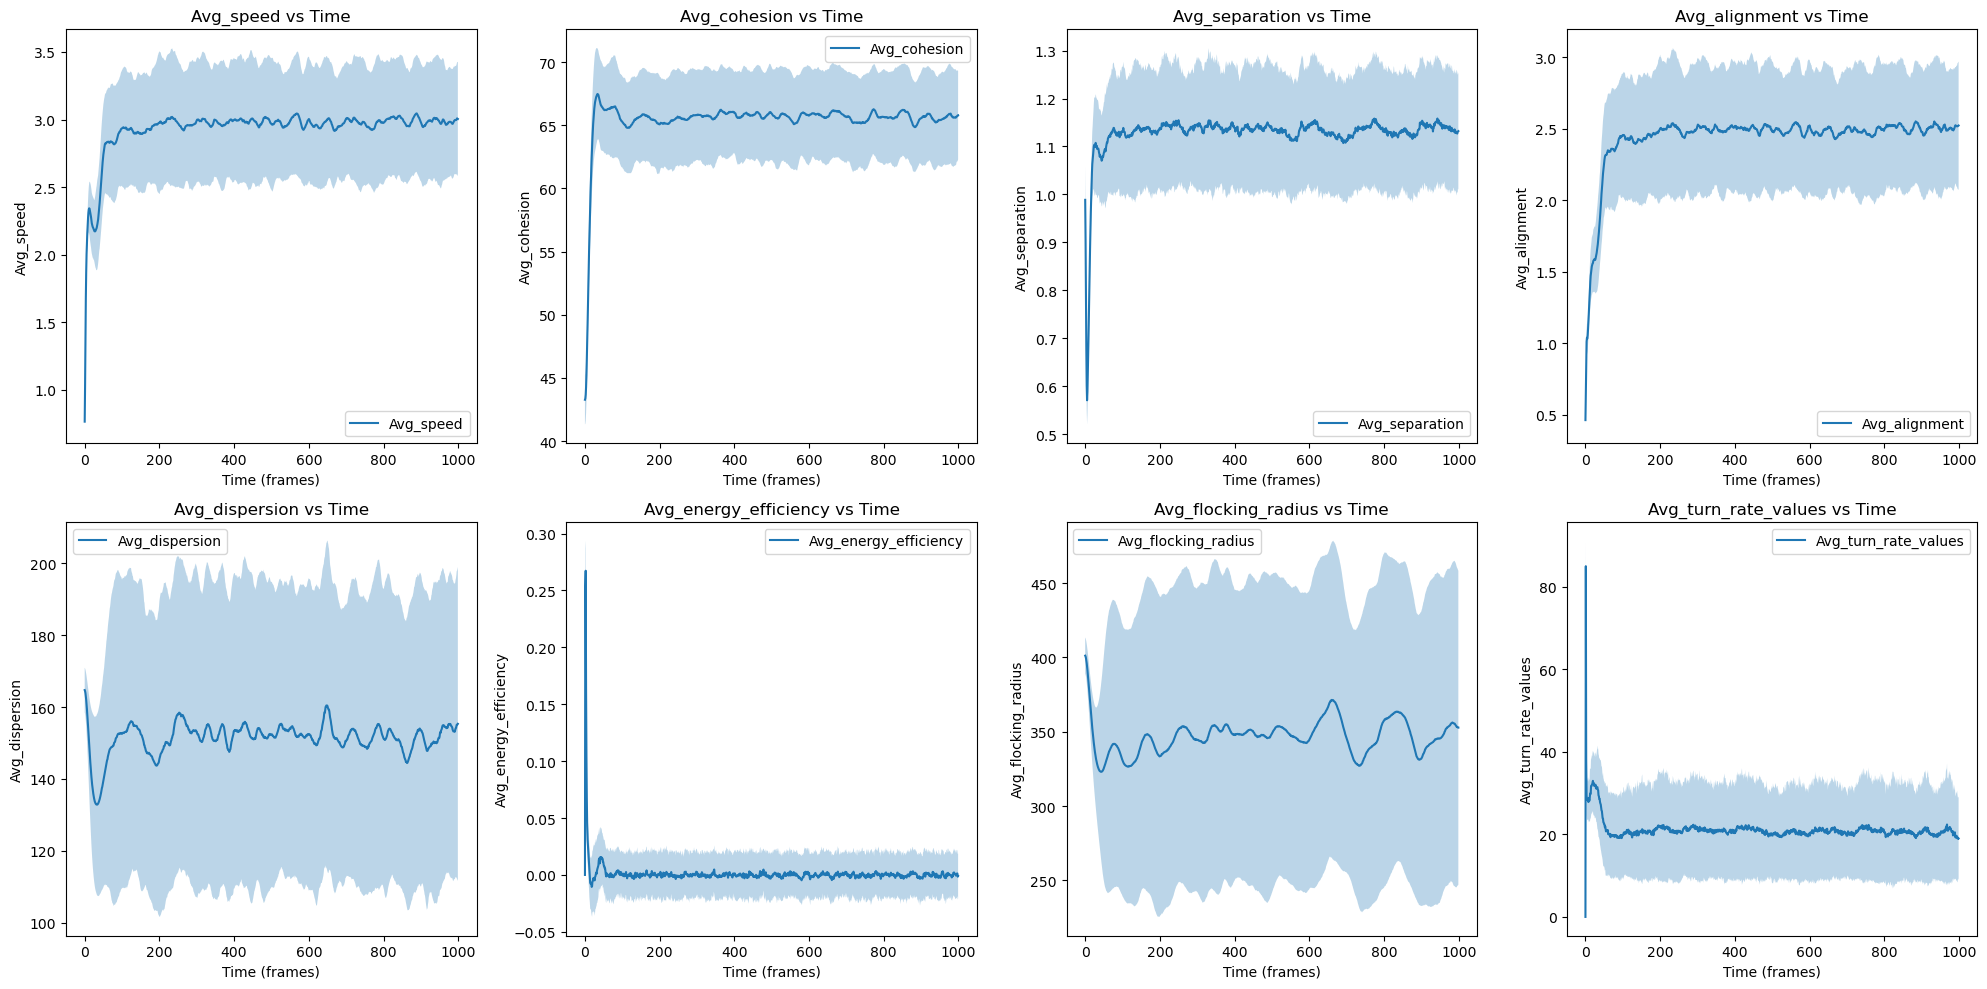

In [27]:
# Plot and save the results
sim.plot_monte_carlo_series_metrics(df, (20, 10))

## 0 Obstacles - 200 Boids - Same separations, alignments, and collions

In [29]:
NUM_BOIDS = 200 # Number of Boids
BOID_SIZE = 5 # Size of Boids on the screen

NUM_OBSTACLES = 0 # Number of obstacles
OBSTACLE_RADIUS = 25 # Size of obstacles on the screen

# Running the Monte Carlo simulation
if __name__ == "__main__":
    sim = Simulation(NUM_BOIDS, NUM_OBSTACLES, NUM_ITERATIONS=1000)
    df = sim.run_monte_carlo_series(num_trials=200)  # Adjust the number of trials as needed

Trial 1/200 completed.
Trial 2/200 completed.
Trial 3/200 completed.
Trial 4/200 completed.
Trial 5/200 completed.
Trial 6/200 completed.
Trial 7/200 completed.
Trial 8/200 completed.
Trial 9/200 completed.
Trial 10/200 completed.
Trial 11/200 completed.
Trial 12/200 completed.
Trial 13/200 completed.
Trial 14/200 completed.
Trial 15/200 completed.
Trial 16/200 completed.
Trial 17/200 completed.
Trial 18/200 completed.
Trial 19/200 completed.
Trial 20/200 completed.
Trial 21/200 completed.
Trial 22/200 completed.
Trial 23/200 completed.
Trial 24/200 completed.
Trial 25/200 completed.
Trial 26/200 completed.
Trial 27/200 completed.
Trial 28/200 completed.
Trial 29/200 completed.
Trial 30/200 completed.
Trial 31/200 completed.
Trial 32/200 completed.
Trial 33/200 completed.
Trial 34/200 completed.
Trial 35/200 completed.
Trial 36/200 completed.
Trial 37/200 completed.
Trial 38/200 completed.
Trial 39/200 completed.
Trial 40/200 completed.
Trial 41/200 completed.
Trial 42/200 completed.
T

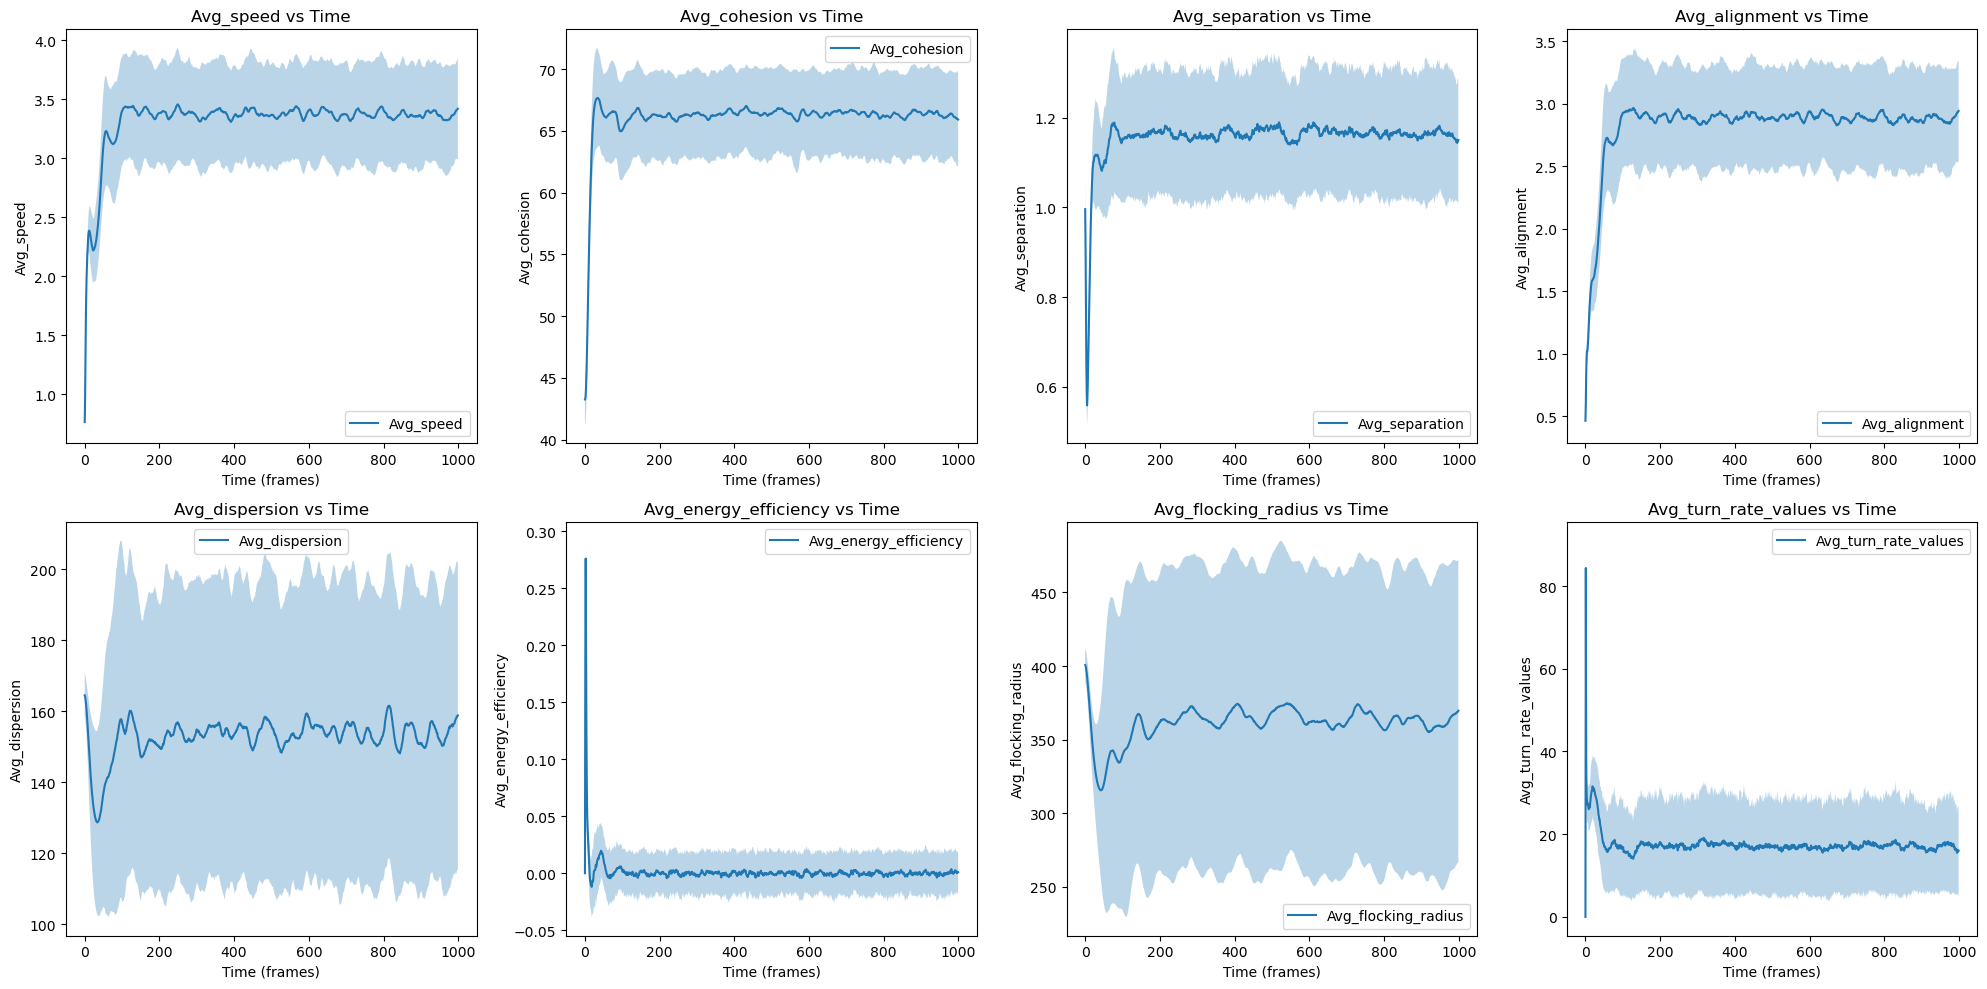

In [30]:
# Plot and save the results
sim.plot_monte_carlo_series_metrics(df, (20, 10))

## 6 Obstacles - 200 Boids - Different separations, alignments, and collions

In [32]:
# NUM_BOIDS = 200 # Number of Boids
# BOID_SIZE = 5 # Size of Boids on the screen

# NUM_OBSTACLES = 6 # Number of obstacles
# OBSTACLE_RADIUS = 25 # Size of obstacles on the screen

# # Running the Monte Carlo simulation
# if __name__ == "__main__":
#     sim = Simulation(NUM_BOIDS, NUM_OBSTACLES, NUM_ITERATIONS=500)
#     df = sim.run_monte_carlo(num_trials=200)  # Adjust the number of trials as needed

In [33]:
# # Plot and save the results
# sim.plot_monte_carlo_metrics(df, (20, 10))

In [34]:
# df

## No Obstacles - 200 Boids - Different separations, alignments, and collions

In [36]:
# NUM_BOIDS = 200 # Number of Boids
# BOID_SIZE = 5 # Size of Boids on the screen

# NUM_OBSTACLES = 0 # Number of obstacles
# OBSTACLE_RADIUS = 25 # Size of obstacles on the screen

# # Running the Monte Carlo simulation
# if __name__ == "__main__":
#     sim = Simulation(NUM_BOIDS, NUM_OBSTACLES, NUM_ITERATIONS=500)
#     df = sim.run_monte_carlo(num_trials=200)  # Adjust the number of trials as needed

In [37]:
# # Plot and save the results
# sim.plot_monte_carlo_metrics(df, (20, 10))

In [38]:
# df